In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from PIL import Image
from termcolor import colored
import codecs

## This notebook is about everyone's favorite beverage...BEER!!!

This notebook is about craft beers, beers that are not produced by the major breweries in the U.S., but by independent brewers and hobbyist brewmasters.  These brews are some of the best brews in the country and this notebook will take a look at some of these brewmasters and which ones are the favorites.

In [2]:
# Load files
beer = pd.read_csv('C:\\Users\\rxbro\\Downloads\\beers.csv')
breweries = pd.read_csv('C:\\Users\\rxbro\\Downloads\\breweries.csv')
beerbeerbeer = pd.read_csv('C:\\Users\\rxbro\\Downloads\\open-beer-database.csv\\open-beer-database.csv')
beer.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


In [3]:
breweries.describe()

,Unnamed: 0
count,558.000000
mean,278.500000
std,161.224998
min,0.000000
25%,139.250000
50%,278.500000
75%,417.750000
max,557.000000


In [4]:
breweries.head(10)

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


Popular Beers

In [5]:
print(beer.groupby('name')['name'].count().sort_values(ascending=False).head(10))

name
Nonstop Hef Hop             12
Dale's Pale Ale              6
Oktoberfest                  6
Longboard Island Lager       4
1327 Pod's ESB               3
Boston Lager                 3
Dagger Falls IPA             3
Narragansett Summer Ale      2
Brontide                     2
Mama's Little Yella Pils     2
Name: name, dtype: int64


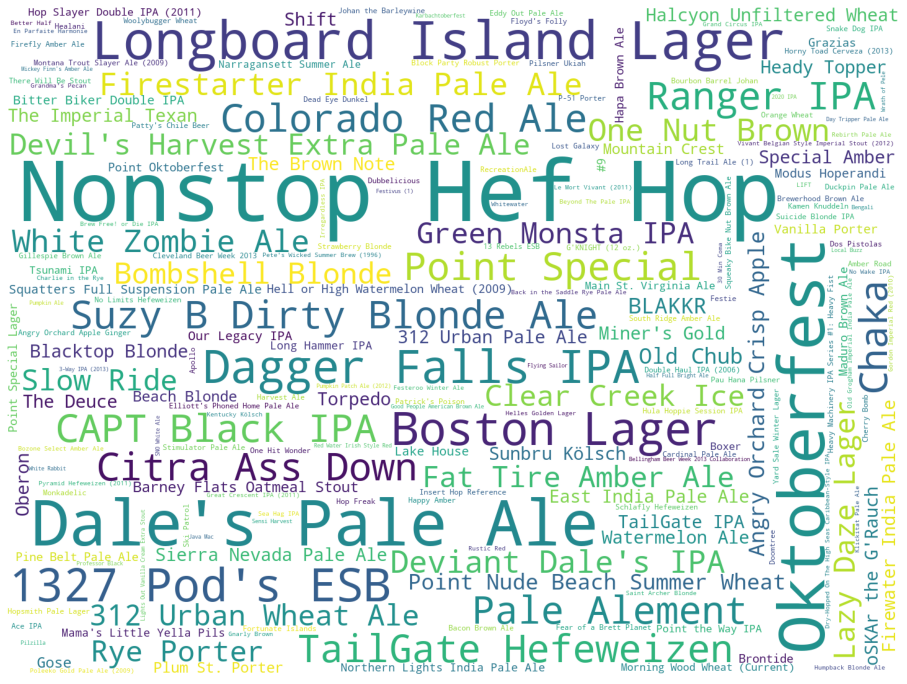

In [6]:
# Word cloud -- visualizing Craft Beers

wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5, background_color='white').generate_from_frequencies(beer['name'].value_counts()))
fig = plt.figure(1, figsize=(16, 16))
plt.imshow(wordcloud, interpolation='hanning')
plt.axis('off')
plt.show()

### Popular Breweries in the U.S.

In [7]:
print(breweries.groupby('name')['name'].count().sort_values(ascending=False).head(10))

name
Blackrocks Brewery         2
Sly Fox Brewing Company    2
Blue Mountain Brewery      2
Otter Creek Brewing        2
Summit Brewing Company     2
Oskar Blues Brewery        2
Lucette Brewing Company    2
Wynkoop Brewing Company    1
Everybody's Brewing        1
Fargo Brewing Company      1
Name: name, dtype: int64


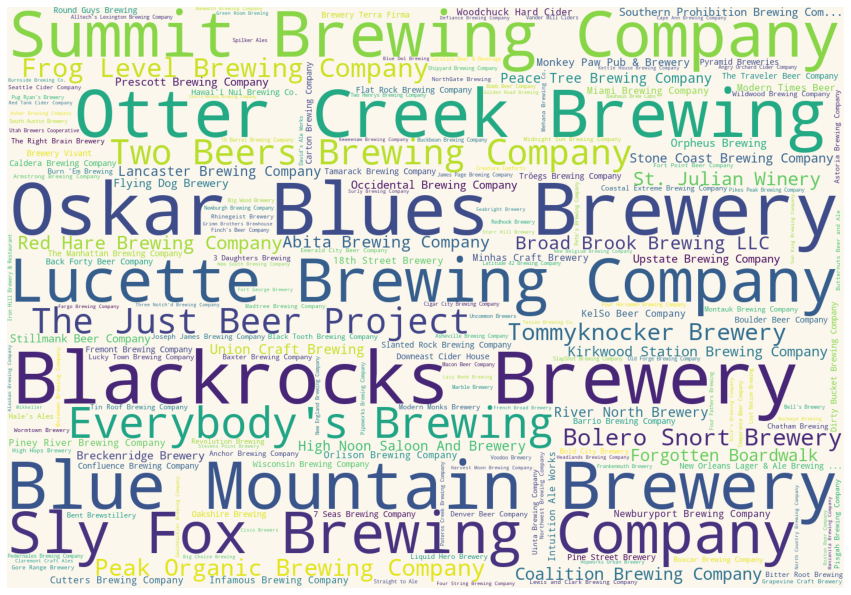

In [8]:
wordcloud = (WordCloud(width=1440, height=1000, relative_scaling=0.5, background_color='#fbf7ed', stopwords=stopwords).generate_from_frequencies(breweries['name'].value_counts()))
fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [9]:
# Popular beer styles
print(colored(beer.groupby('style')['name'].count().sort_values(ascending=False).head(10), 'green'))

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: name, dtype: int64


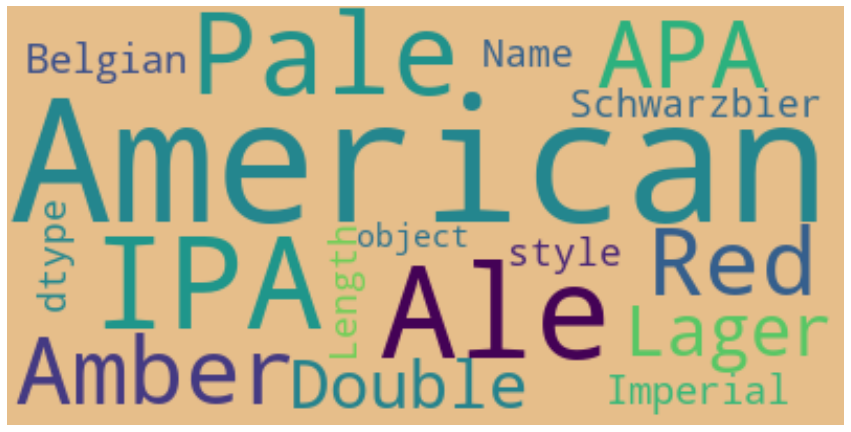

In [10]:
wordcloud = (WordCloud(max_font_size=100, min_font_size=8, stopwords=stopwords, background_color='#E6BE8A').generate(str(beer['style'])))
fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
print(colored(breweries.groupby('city')['city'].count().sort_values(ascending=False).head(10), 'blue'))

city
Portland         17
Boulder           9
Seattle           9
Chicago           9
Austin            8
Denver            8
San Diego         8
Bend              6
San Francisco     5
Columbus          4
Name: city, dtype: int64


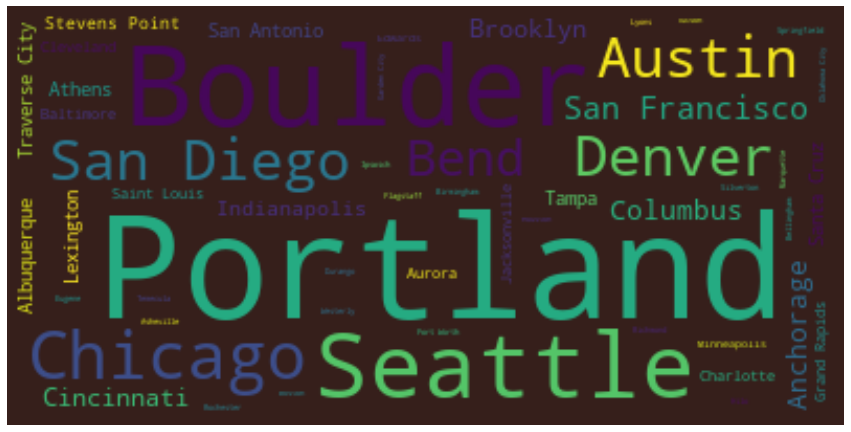

In [12]:
wordcloud = (WordCloud(max_words=200, stopwords=stopwords, background_color='#361F1B', margin=10).generate_from_frequencies(breweries['city'].value_counts()))
fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# States for Beer lovers
breweries.groupby('state')['state'].count().sort_values(ascending=False).head(3)
print(colored('Top 3 states with Maximum Breweries for Craft Canned Beers:', 'blue'))
print(colored("1. Colorado", 'green'))
print(colored("2. California", 'green'))
print(colored("3. Michigan", 'green'))

Top 3 states with Maximum Breweries for Craft Canned Beers:
1. Colorado
2. California
3. Michigan


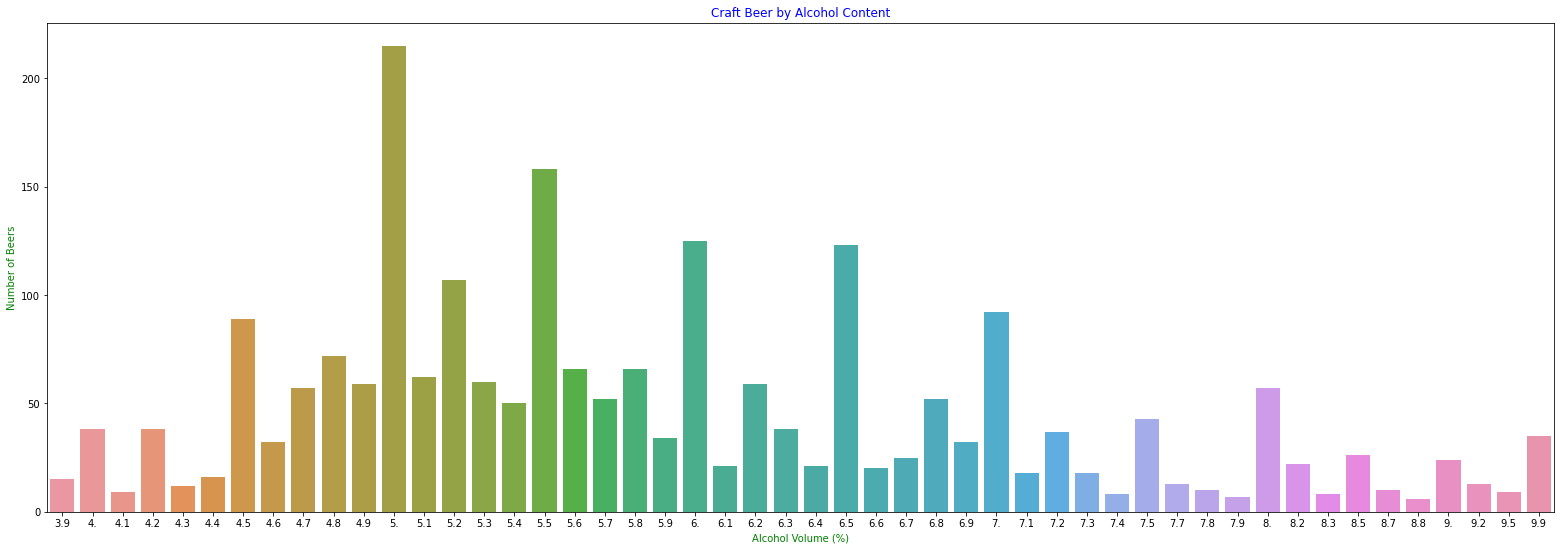

In [14]:
# Beers by Alcohol Content
temp = beer.groupby('abv')['name'].count().sort_values(ascending=False).head(50)
x = list(temp.index.values)
for i in range(len(x)):
    x[i] = np.format_float_positional(np.float16(x[i]*100))
y = temp.values
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 27
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
sns.barplot(x, y)
plt.xlabel("Alcohol Volume (%)", color='green')
plt.ylabel("Number of Beers", color='green')
plt.title("Craft Beer by Alcohol Content", color='blue')
plt.show()

### Bitterness vs Alcohol By Volume of Craft Beer

Text(0.5, 1.0, 'Craft Beers -- Bitterness vs Alcohol Content')

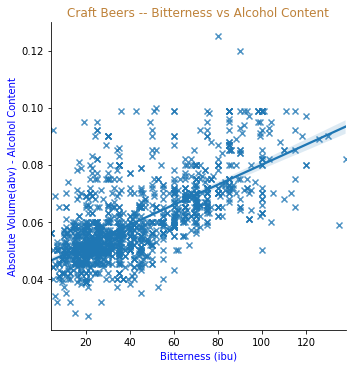

In [15]:
beertemp = beer
beertemp.dropna(inplace=True)
sns.lmplot("ibu", 'abv', data=beertemp, markers='x')
plt.xlabel('Bitterness (ibu)', color='blue')
plt.ylabel('Absolute Volume(abv) - Alcohol Content', color='blue')
plt.title('Craft Beers -- Bitterness vs Alcohol Content', color='#BE823A')

### Which Beers are highly bitter & have high alcohol content?

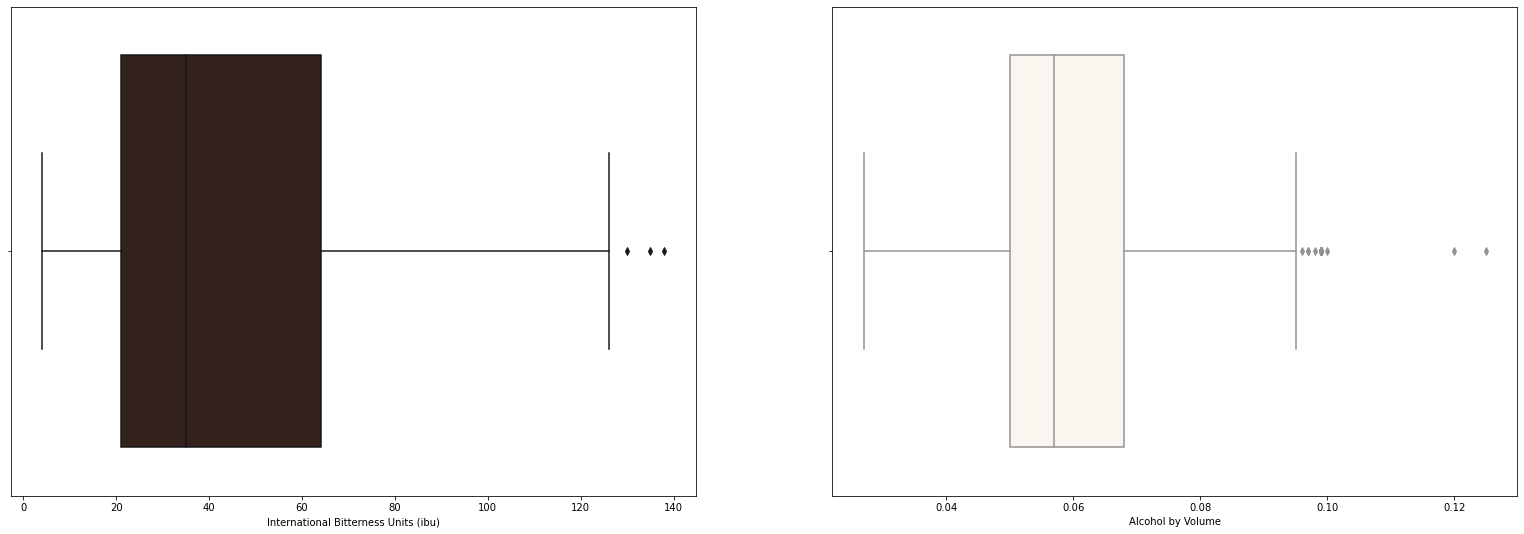

In [16]:
fig = plt.figure()
plt.subplot(1, 2,1)
sns.boxplot(beertemp['ibu'], color='#361F1B')
plt.xlabel("International Bitterness Units (ibu)")
plt.subplot(1, 2,2)
sns.boxplot(beertemp['abv'], color='#fbf7ed')
plt.xlabel('Alcohol by Volume')
plt.show()

### Can I get a craft beer with high alcohol content and average bitterness?

In [17]:
HighBeer = beertemp.sort_values('abv', ascending=False)
AvgBitterness = beertemp['ibu'].mean()
HighBeer = HighBeer[HighBeer['ibu'] <= AvgBitterness].reset_index().head(1)
HighBeer[['name', 'style']]

,name,style
0,Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale
